In [109]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import numpy as np
from pathlib import Path
from dotenv import load_dotenv
from math import radians, cos, sin, asin, sqrt , pi
pd.options.plotting.backend = "plotly"

import janitor as jn

%matplotlib inline

1. Adjust Count for Neighborhoods by saleprice or investiaget financial district north 
2. finish combining dataframe 
3. finish visualization
4. clean up and include markdown
5. make storyline

In [110]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")


## Explortory Data Analysis

In [111]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [112]:
sfo_data= sfo_data.reset_index()

In [113]:

# Load neighborhoods coordinates data
coordinate_file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(coordinate_file_path)
df_neighborhood_locations.head()


,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [114]:
df_neighborhood_locations = df_neighborhood_locations.rename(columns={'Neighborhood':'neighborhood'})

In [115]:
sfo_neighborhood_data = pd.merge(sfo_data , df_neighborhood_locations , how= 'right', on = 'neighborhood')

In [116]:
sfo_neighborhood_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 376
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 373 non-null    float64
 1   neighborhood         377 non-null    object 
 2   sale_price_sqr_foot  368 non-null    float64
 3   housing_units        373 non-null    float64
 4   gross_rent           373 non-null    float64
 5   Lat                  377 non-null    float64
 6   Lon                  377 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.6+ KB


In [117]:
sfo_neighborhood_data['year'] = pd.to_datetime(sfo_neighborhood_data.year , format='%Y')
sfo_neighborhood_data = sfo_neighborhood_data.set_index('year')

In [118]:
sfo_data.shape

(397, 5)

In [119]:
neighborhoods = sfo_data.neighborhood.unique()

In [120]:
len(neighborhoods)

73

In [121]:
len(sfo_data.year.unique())

7

In [122]:
neighborhood_count_in_data = sfo_data.neighborhood.value_counts()

In [123]:
sfo_data.describe()

,year,sale_price_sqr_foot,housing_units,gross_rent
count,397.000000,392.000000,397.000000,397.000000
mean,2012.901763,489.209635,378209.732997,2765.722922
std,1.963794,240.084910,3823.506872,1068.961546
min,2010.000000,40.772625,372560.000000,1239.000000
25%,2011.000000,332.947034,374507.000000,1530.000000
50%,2013.000000,438.664166,378401.000000,2971.000000
75%,2015.000000,584.609840,382295.000000,3739.000000
max,2016.000000,2258.702832,384242.000000,4390.000000


In [124]:
sfo_data.isna().sum()

year                   0
neighborhood           0
sale_price_sqr_foot    5
housing_units          0
gross_rent             0
dtype: int64

In [125]:
neighborhoods_with_missing_data = neighborhood_count_in_data[neighborhood_count_in_data < 7].index
neighborhoods_wo_missing_data = neighborhood_count_in_data[neighborhood_count_in_data == 7].index

# print(neighborhood_count_in_data[neighborhood_count_in_data < 7].index)

In [126]:
neighborhoods_with_missing_data

Index(['Excelsior', 'Union Square District', 'Buena Vista Park', 'Sunnyside',
       'Yerba Buena', 'Bernal Heights ', 'Croker Amazon', 'Parkside',
       'Lake --The Presidio', 'Lone Mountain', 'Western Addition',
       'Anza Vista', 'Mission Dolores', 'Mission Bay', 'Glen Park',
       'Financial District South', 'Golden Gate Heights', 'North Beach',
       'Portola', 'North Waterfront', 'Corona Heights', 'Mission Terrace',
       'Bayview', 'Duboce Triangle', 'Visitacion Valley', 'Outer Mission',
       'Ingleside ', 'West Portal', 'Inner Parkside', 'Diamond Heights',
       'Miraloma Park', 'South Beach', 'Oceanview', 'Merced Heights',
       'Clarendon Heights', 'Ingleside Heights', 'Forest Knolls',
       'Westwood Highlands', 'Midtown Terrace', 'Hunters Point',
       'Westwood Park', 'Silver Terrace', 'Bayview Heights'],
      dtype='object')

In [127]:
neighborhoods_wo_missing_data

Index(['Alamo Square', 'Pacific Heights', 'Inner Sunset',
       'Jordan Park/Laurel Heights', 'Lower Pacific Heights', 'Marina',
       'Nob Hill', 'Outer Parkside', 'Outer Richmond ', 'Outer Sunset',
       'Park North', 'Inner Mission', 'Parnassus/Ashbury Heights',
       'Potrero Hill', 'Presidio Heights', 'Russian Hill', 'South of Market',
       'Telegraph Hill', 'Twin Peaks', 'Van Ness/ Civic Center',
       'Inner Richmond', 'Noe Valley', 'Cow Hollow',
       'Eureka Valley/Dolores Heights', 'Central Richmond', 'Central Sunset',
       'Downtown ', 'Financial District North', 'Haight Ashbury',
       'Hayes Valley'],
      dtype='object')

In [128]:
sfo_data[sfo_data.sale_price_sqr_foot.isna()]

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
204,2013,Mission Bay,NaN,378401,2971
313,2015,Hunters Point,NaN,382295,3739
337,2015,Parkside,NaN,382295,3739
340,2015,Presidio Heights,NaN,382295,3739
362,2016,Financial District North,NaN,384242,4390


In [226]:
mask_missing_data = sfo_neighborhood_data.neighborhood.isin(neighborhoods_with_missing_data)
mask_full_data = sfo_neighborhood_data.neighborhood.isin(neighborhoods_wo_missing_data)

In [228]:
neighborhoods_with_missing_data_df = sfo_neighborhood_data[mask_missing_data]
neighborhoods_wo_missing_data_df = sfo_neighborhood_data[mask_full_data]

In [131]:
neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df['neighborhood'] == "Financial District North"].value_counts()

neighborhood              sale_price_sqr_foot  housing_units  gross_rent  Lat       Lon      
Financial District North  274.457944           378401.0       2971.0      37.79101  -122.4021    1
                          281.312904           374507.0       1530.0      37.79101  -122.4021    1
                          286.351982           376454.0       2324.0      37.79101  -122.4021    1
                          401.749967           372560.0       1239.0      37.79101  -122.4021    1
                          409.943835           380348.0       3528.0      37.79101  -122.4021    1
                          694.358567           382295.0       3739.0      37.79101  -122.4021    1
dtype: int64

In [132]:
neighborhoods_wo_missing_data_df_pct_change = neighborhoods_wo_missing_data_df.groupby(['neighborhood', 'Lat', 'Lon']).pct_change(axis = 'rows')

In [134]:
neighborhoods_wo_missing_data_df_pct_change

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010-01-01,NaN,NaN,NaN
2011-01-01,-0.064068,0.005226,0.234867
2012-01-01,-0.328143,0.005199,0.518954
2013-01-01,1.117944,0.005172,0.278399
2014-01-01,0.249229,0.005145,0.187479
...,...,...,...
2012-01-01,-0.099623,0.005199,0.518954
2013-01-01,-0.176173,0.005172,0.278399
2014-01-01,0.667991,0.005145,0.187479


In [135]:
missing_data_coordinate_mask = df_neighborhood_locations.neighborhood.isin(neighborhoods_with_missing_data)
full_data_coordinate_mask = df_neighborhood_locations.neighborhood.isin(neighborhoods_wo_missing_data)

In [136]:
missing_data_neighborhood_coordinates = df_neighborhood_locations[missing_data_coordinate_mask]
full_data_neighborhood_coordinates = df_neighborhood_locations[full_data_coordinate_mask]

In [137]:
def distance_formula(lat1, lat2, lon1, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 6371* asin(sqrt(a))

In [138]:
full_data_neighborhood_coordinates[full_data_neighborhood_coordinates.neighborhood == 'Central Richmond']

,neighborhood,Lat,Lon
6,Central Richmond,37.77789,-122.44517


In [140]:
closest_neighborhoods = {}
for neighborhood_1 in missing_data_neighborhood_coordinates.iterrows():
    lat1 = neighborhood_1[1][1]
    lon1 = neighborhood_1[1][2]
    distances = {} 

    for neighborhood_2 in full_data_neighborhood_coordinates.iterrows():
        lat2 = neighborhood_2[1][1]
        lon2 = neighborhood_2[1][2]
        distances[neighborhood_2[1][0]] = distance_formula(lat1,lat2,lon1,lon2)
    closest_place = [min(distances, key = distances.get), distances[min(distances, key=distances.get)]]
    closest_neighborhoods[neighborhood_1[1][0]] = closest_place


In [141]:
closest_neighborhoods

{'Anza Vista': ['Central Richmond', 0.12134062707765597],
 'Bayview': ['Potrero Hill', 0.7979043876003843],
 'Bayview Heights': ['Potrero Hill', 1.2328508190151974],
 'Buena Vista Park': ['Haight Ashbury', 0.21934671603087758],
 'Clarendon Heights': ['Noe Valley', 0.0],
 'Corona Heights': ['Jordan Park/Laurel Heights', 0.0],
 'Croker Amazon': ['Outer Parkside', 1.63859715125785],
 'Diamond Heights': ['Outer Parkside', 1.289174459907612],
 'Duboce Triangle': ['Haight Ashbury', 0.49697102636564955],
 'Excelsior': ['Potrero Hill', 1.2328508190151974],
 'Financial District South': ['Financial District North', 0.0],
 'Forest Knolls': ['Parnassus/Ashbury Heights', 0.3779654586049573],
 'Glen Park': ['Outer Parkside', 1.289174459907612],
 'Golden Gate Heights': ['Parnassus/Ashbury Heights', 0.4202960782163469],
 'Hunters Point': ['Potrero Hill', 0.6184999488714437],
 'Ingleside Heights': ['Park North', 0.5503013103010508],
 'Inner Parkside': ['Central Sunset', 0.0],
 'Lake --The Presidio': ['

In [142]:
neighborhoods_with_missing_data_df[neighborhoods_with_missing_data_df.neighborhood == "Anza Vista"]

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
year,,,,,,
2010-01-01,Anza Vista,267.932583,372560.0,1239.0,37.779598,-122.443451
2012-01-01,Anza Vista,344.490914,376454.0,2324.0,37.779598,-122.443451
2013-01-01,Anza Vista,453.340498,378401.0,2971.0,37.779598,-122.443451
2014-01-01,Anza Vista,620.441407,380348.0,3528.0,37.779598,-122.443451
2015-01-01,Anza Vista,465.686275,382295.0,3739.0,37.779598,-122.443451
2016-01-01,Anza Vista,88.401511,384242.0,4390.0,37.779598,-122.443451


In [143]:
neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df.neighborhood == "Central Richmond"]

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
year,,,,,,
2010-01-01,Central Richmond,319.027623,372560.0,1239.0,37.77789,-122.44517
2011-01-01,Central Richmond,261.663800,374507.0,1530.0,37.77789,-122.44517
2012-01-01,Central Richmond,279.030140,376454.0,2324.0,37.77789,-122.44517
2013-01-01,Central Richmond,343.054261,378401.0,2971.0,37.77789,-122.44517
2014-01-01,Central Richmond,423.952727,380348.0,3528.0,37.77789,-122.44517
2015-01-01,Central Richmond,473.163815,382295.0,3739.0,37.77789,-122.44517
2016-01-01,Central Richmond,661.064426,384242.0,4390.0,37.77789,-122.44517


In [144]:
neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df.neighborhood == 'Potrero Hill']

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
year,,,,,,
2010-01-01,Potrero Hill,491.450004,372560.0,1239.0,37.73196,-122.38324
2011-01-01,Potrero Hill,503.138505,374507.0,1530.0,37.73196,-122.38324
2012-01-01,Potrero Hill,466.647840,376454.0,2324.0,37.73196,-122.38324
2013-01-01,Potrero Hill,598.704795,378401.0,2971.0,37.73196,-122.38324
2014-01-01,Potrero Hill,1045.201546,380348.0,3528.0,37.73196,-122.38324
2015-01-01,Potrero Hill,821.300990,382295.0,3739.0,37.73196,-122.38324
2016-01-01,Potrero Hill,707.651609,384242.0,4390.0,37.73196,-122.38324


In [145]:
neighborhoods_wo_missing_data_df_mean_pct_change = neighborhoods_wo_missing_data_df['sale_price_sqr_foot'].groupby(['year']).mean().pct_change()

In [146]:
neighborhoods_wo_missing_data_df_mean_pct_change

year
2010-01-01         NaN
2011-01-01   -0.003499
2012-01-01    0.056703
2013-01-01    0.196410
2014-01-01    0.275011
2015-01-01    0.080047
2016-01-01    0.091465
Name: sale_price_sqr_foot, dtype: float64

In [147]:
sqr_foot_rate_yearly_change = {}
for x,y in neighborhoods_wo_missing_data_df_mean_pct_change.items():
    sqr_foot_rate_yearly_change[x.strftime('%Y-%m-%d')] = y


In [148]:
sqr_foot_rate_yearly_change

{'2010-01-01': nan,
 '2011-01-01': -0.003499274936500485,
 '2012-01-01': 0.05670310319245053,
 '2013-01-01': 0.19640989399007736,
 '2014-01-01': 0.27501064521757956,
 '2015-01-01': 0.08004679587558217,
 '2016-01-01': 0.09146489382064527}

In [149]:
yearly_avg_rent = {}
for x , y in zip(neighborhoods_wo_missing_data_df_mean_pct_change.items(), sfo_data['gross_rent'].unique()): 
    yearly_avg_rent[x[0].strftime('%Y-%m-%d')] = y

In [150]:
yearly_avg_rent

{'2010-01-01': 1239,
 '2011-01-01': 1530,
 '2012-01-01': 2324,
 '2013-01-01': 2971,
 '2014-01-01': 3528,
 '2015-01-01': 3739,
 '2016-01-01': 4390}

In [151]:
yearly_avg_housing_units = {}
for x , y in zip(neighborhoods_wo_missing_data_df_mean_pct_change.items(), sfo_data['housing_units'].unique()): 
    yearly_avg_housing_units[x[0].strftime('%Y-%m-%d')] = y


In [152]:
yearly_avg_housing_units

{'2010-01-01': 372560,
 '2011-01-01': 374507,
 '2012-01-01': 376454,
 '2013-01-01': 378401,
 '2014-01-01': 380348,
 '2015-01-01': 382295,
 '2016-01-01': 384242}

In [153]:
neighborhoods_with_missing_data_df = neighborhoods_with_missing_data_df.reset_index()

In [154]:
neighborhoods_with_missing_data_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,2010-01-01,Anza Vista,267.932583,372560.0,1239.0,37.779598,-122.443451
1,2012-01-01,Anza Vista,344.490914,376454.0,2324.0,37.779598,-122.443451
2,2013-01-01,Anza Vista,453.340498,378401.0,2971.0,37.779598,-122.443451
3,2014-01-01,Anza Vista,620.441407,380348.0,3528.0,37.779598,-122.443451
4,2015-01-01,Anza Vista,465.686275,382295.0,3739.0,37.779598,-122.443451
...,...,...,...,...,...,...,...
172,2011-01-01,Yerba Buena,438.860545,374507.0,1530.0,37.792980,-122.396360
173,2012-01-01,Yerba Buena,491.814003,376454.0,2324.0,37.792980,-122.396360
174,2013-01-01,Yerba Buena,753.011413,378401.0,2971.0,37.792980,-122.396360
175,2014-01-01,Yerba Buena,479.923749,380348.0,3528.0,37.792980,-122.396360


In [155]:
dates = dict(year = pd.date_range(neighborhoods_with_missing_data_df.year.min(), neighborhoods_with_missing_data_df.year.max(),freq= 'AS'))

In [156]:
jan_df = neighborhoods_with_missing_data_df.complete(dates, by= ['neighborhood'], sort= True).fillna(0)

In [157]:
jan_df['Lat'] = jan_df['Lat'].replace(to_replace = 0 , method = 'ffill')
jan_df['Lon'] = jan_df['Lon'].replace(to_replace = 0 , method = 'ffill')

In [158]:
jan_df = jan_df.replace(0, np.nan)

In [159]:
jan_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,2010-01-01,Anza Vista,267.932583,372560.0,1239.0,37.779598,-122.443451
1,2011-01-01,Anza Vista,NaN,NaN,NaN,37.779598,-122.443451
2,2012-01-01,Anza Vista,344.490914,376454.0,2324.0,37.779598,-122.443451
3,2013-01-01,Anza Vista,453.340498,378401.0,2971.0,37.779598,-122.443451
4,2014-01-01,Anza Vista,620.441407,380348.0,3528.0,37.779598,-122.443451
...,...,...,...,...,...,...,...
282,2012-01-01,Yerba Buena,491.814003,376454.0,2324.0,37.792980,-122.396360
283,2013-01-01,Yerba Buena,753.011413,378401.0,2971.0,37.792980,-122.396360
284,2014-01-01,Yerba Buena,479.923749,380348.0,3528.0,37.792980,-122.396360
285,2015-01-01,Yerba Buena,963.522606,382295.0,3739.0,37.792980,-122.396360


In [160]:
jan_df.neighborhood.value_counts()

Anza Vista                  7
Miraloma Park               7
Mission Dolores             7
Mission Terrace             7
North Beach                 7
North Waterfront            7
Oceanview                   7
Outer Mission               7
Parkside                    7
Portola                     7
Silver Terrace              7
South Beach                 7
Sunnyside                   7
Union Square District       7
Visitacion Valley           7
West Portal                 7
Western Addition            7
Westwood Highlands          7
Westwood Park               7
Mission Bay                 7
Midtown Terrace             7
Bayview                     7
Merced Heights              7
Bayview Heights             7
Buena Vista Park            7
Clarendon Heights           7
Corona Heights              7
Croker Amazon               7
Diamond Heights             7
Duboce Triangle             7
Excelsior                   7
Financial District South    7
Forest Knolls               7
Glen Park 

In [161]:
sfo_data['gross_rent'].unique()

array([1239, 1530, 2324, 2971, 3528, 3739, 4390], dtype=int64)

In [162]:
sfo_data['housing_units'].unique()

array([372560, 374507, 376454, 378401, 380348, 382295, 384242],
      dtype=int64)

In [163]:
over_the_threshold_missing_data = []
for neighborhood in neighborhoods_with_missing_data:
    percent_missing = jan_df[jan_df['neighborhood'] == neighborhood]['sale_price_sqr_foot'].isnull().sum()/7
    if percent_missing > 0.60: 
        over_the_threshold_missing_data.append(neighborhood)


In [164]:
over_the_threshold_missing_data

['Clarendon Heights',
 'Ingleside Heights',
 'Forest Knolls',
 'Westwood Highlands',
 'Midtown Terrace',
 'Hunters Point',
 'Westwood Park',
 'Silver Terrace',
 'Bayview Heights']

In [165]:
enough_data_mask = ~jan_df['neighborhood'].isin(over_the_threshold_missing_data)

In [166]:
enough_data_neighborhoods = jan_df[enough_data_mask]

In [177]:
enough_data_neighborhoods

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,2010-01-01,Anza Vista,267.932583,372560.0,1239.0,37.779598,-122.443451
1,2011-01-01,Anza Vista,NaN,NaN,NaN,37.779598,-122.443451
2,2012-01-01,Anza Vista,344.490914,376454.0,2324.0,37.779598,-122.443451
3,2013-01-01,Anza Vista,453.340498,378401.0,2971.0,37.779598,-122.443451
4,2014-01-01,Anza Vista,620.441407,380348.0,3528.0,37.779598,-122.443451
...,...,...,...,...,...,...,...
282,2012-01-01,Yerba Buena,491.814003,376454.0,2324.0,37.792980,-122.396360
283,2013-01-01,Yerba Buena,753.011413,378401.0,2971.0,37.792980,-122.396360
284,2014-01-01,Yerba Buena,479.923749,380348.0,3528.0,37.792980,-122.396360
285,2015-01-01,Yerba Buena,963.522606,382295.0,3739.0,37.792980,-122.396360


In [178]:
enough_data_neighborhoods['neighborhood'].unique()

array(['Anza Vista', 'Bayview', 'Buena Vista Park', 'Corona Heights',
       'Croker Amazon', 'Diamond Heights', 'Duboce Triangle', 'Excelsior',
       'Financial District South', 'Glen Park', 'Golden Gate Heights',
       'Inner Parkside', 'Lake --The Presidio', 'Lone Mountain',
       'Merced Heights', 'Miraloma Park', 'Mission Bay',
       'Mission Dolores', 'Mission Terrace', 'North Beach',
       'North Waterfront', 'Oceanview', 'Outer Mission', 'Parkside',
       'Portola', 'South Beach', 'Sunnyside', 'Union Square District',
       'Visitacion Valley', 'West Portal', 'Western Addition',
       'Yerba Buena'], dtype=object)

In [207]:
def interpolate_data(list_of_neighborhoods, dataframe, sqr_foot_grwth_rate , yealy_rent, yearly_housing_units):
    index_name = dataframe.index.name
    interpolated_df_list = []
    if index_name == None: 
        pass 
    else: 
        dataframe = dataframe.reset_index()
    for neighborhood in list_of_neighborhoods:
        temp_df = dataframe[dataframe['neighborhood'] == neighborhood].replace(0, np.nan)
        list_of_years_with_missing_values = [x.strftime('%Y-%m-%d') for x in temp_df[temp_df.isna().any(axis = 1)]['year']]
        for year in list_of_years_with_missing_values:
            if year == '2010-01-01': 
                previous_value = temp_df['sale_price_sqr_foot'].loc[temp_df['year'].shift(1) == year].values[0]
                rate_of_change = previous_value/(1+ sqr_foot_grwth_rate[list_of_years_with_missing_values[1]])
                temp_df.loc[(temp_df['year'] == year), 'sale_price_sqr_foot'] = rate_of_change
            
            else:
                previous_value = temp_df['sale_price_sqr_foot'].loc[temp_df['year'].shift(-1) == year].values[0]
                rate_of_change = previous_value*(1+ sqr_foot_grwth_rate[year])
                temp_df.loc[(temp_df['year'] == year), 'sale_price_sqr_foot'] = rate_of_change
            temp_df.loc[(temp_df['year'] == year), 'housing_units'] = yearly_housing_units[year]
            temp_df.loc[(temp_df['year'] == year), 'gross_rent'] = yealy_rent[year]
        interpolated_df_list.append(temp_df)
    final_interpolated_df = pd.concat(interpolated_df_list, axis = 0)
    return final_interpolated_df


In [202]:
final_interpolated_df = interpolate_data(enough_data_neighborhoods['neighborhood'].unique(), jan_df , sqr_foot_rate_yearly_change, yearly_avg_rent, yearly_avg_housing_units )

In [181]:
final_interpolated_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,2010-01-01,Anza Vista,267.932583,372560.0,1239.0,37.779598,-122.443451
1,2011-01-01,Anza Vista,266.995013,374507.0,1530.0,37.779598,-122.443451
2,2012-01-01,Anza Vista,344.490914,376454.0,2324.0,37.779598,-122.443451
3,2013-01-01,Anza Vista,453.340498,378401.0,2971.0,37.779598,-122.443451
4,2014-01-01,Anza Vista,620.441407,380348.0,3528.0,37.779598,-122.443451
...,...,...,...,...,...,...,...
282,2012-01-01,Yerba Buena,491.814003,376454.0,2324.0,37.792980,-122.396360
283,2013-01-01,Yerba Buena,753.011413,378401.0,2971.0,37.792980,-122.396360
284,2014-01-01,Yerba Buena,479.923749,380348.0,3528.0,37.792980,-122.396360
285,2015-01-01,Yerba Buena,963.522606,382295.0,3739.0,37.792980,-122.396360


In [182]:
final_interpolated_df[final_interpolated_df['sale_price_sqr_foot'].isna()]

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
133,2010-01-01,Merced Heights,NaN,372560.0,1239.0,37.77890,-122.45496
134,2011-01-01,Merced Heights,NaN,374507.0,1530.0,37.77890,-122.45496
245,2010-01-01,Visitacion Valley,NaN,372560.0,1239.0,37.79101,-122.40210
246,2011-01-01,Visitacion Valley,NaN,374507.0,1530.0,37.79101,-122.40210
247,2012-01-01,Visitacion Valley,NaN,376454.0,2324.0,37.79101,-122.40210


In [238]:
final_interpolated_df= final_interpolated_df.drop(final_interpolated_df[final_interpolated_df['neighborhood'].isin(['Merced Heights', 'Visitacion Valley'])].index)

In [239]:
final_interpolated_df

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,2010-01-01,Anza Vista,267.932583,372560.0,1239.0,37.779598,-122.443451
1,2011-01-01,Anza Vista,266.995013,374507.0,1530.0,37.779598,-122.443451
2,2012-01-01,Anza Vista,344.490914,376454.0,2324.0,37.779598,-122.443451
3,2013-01-01,Anza Vista,453.340498,378401.0,2971.0,37.779598,-122.443451
4,2014-01-01,Anza Vista,620.441407,380348.0,3528.0,37.779598,-122.443451
...,...,...,...,...,...,...,...
282,2012-01-01,Yerba Buena,491.814003,376454.0,2324.0,37.792980,-122.396360
283,2013-01-01,Yerba Buena,753.011413,378401.0,2971.0,37.792980,-122.396360
284,2014-01-01,Yerba Buena,479.923749,380348.0,3528.0,37.792980,-122.396360
285,2015-01-01,Yerba Buena,963.522606,382295.0,3739.0,37.792980,-122.396360


In [240]:
final_interpolated_df[final_interpolated_df['sale_price_sqr_foot'].isna()]

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon


In [216]:
neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df['sale_price_sqr_foot'].isna()]

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
year,,,,,,
2016-01-01,Financial District North,NaN,384242.0,4390.0,37.79101,-122.4021
2015-01-01,Presidio Heights,NaN,382295.0,3739.0,37.78553,-122.4560


In [217]:
neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df['neighborhood'] == "Financial District North"]

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
year,,,,,,
2010-01-01,Financial District North,401.749967,372560.0,1239.0,37.79101,-122.4021
2011-01-01,Financial District North,281.312904,374507.0,1530.0,37.79101,-122.4021
2012-01-01,Financial District North,286.351982,376454.0,2324.0,37.79101,-122.4021
2013-01-01,Financial District North,274.457944,378401.0,2971.0,37.79101,-122.4021
2014-01-01,Financial District North,409.943835,380348.0,3528.0,37.79101,-122.4021
2015-01-01,Financial District North,694.358567,382295.0,3739.0,37.79101,-122.4021
2016-01-01,Financial District North,NaN,384242.0,4390.0,37.79101,-122.4021


In [218]:
 neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df['neighborhood'] == "Presidio Heights"]

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
year,,,,,,
2010-01-01,Presidio Heights,549.417931,372560.0,1239.0,37.78553,-122.456
2011-01-01,Presidio Heights,493.814917,374507.0,1530.0,37.78553,-122.456
2012-01-01,Presidio Heights,426.608592,376454.0,2324.0,37.78553,-122.456
2013-01-01,Presidio Heights,512.840248,378401.0,2971.0,37.78553,-122.456
2014-01-01,Presidio Heights,603.450997,380348.0,3528.0,37.78553,-122.456
2015-01-01,Presidio Heights,NaN,382295.0,3739.0,37.78553,-122.456
2016-01-01,Presidio Heights,1465.968586,384242.0,4390.0,37.78553,-122.456


In [229]:
interpolated_districts = interpolate_data(['Financial District North', 'Presidio Heights'] , neighborhoods_wo_missing_data_df, sqr_foot_rate_yearly_change , yearly_avg_rent , yearly_avg_housing_units)

In [230]:
interpolated_districts

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
35,2010-01-01,Financial District North,401.749967,372560.0,1239.0,37.79101,-122.4021
36,2011-01-01,Financial District North,281.312904,374507.0,1530.0,37.79101,-122.4021
37,2012-01-01,Financial District North,286.351982,376454.0,2324.0,37.79101,-122.4021
38,2013-01-01,Financial District North,274.457944,378401.0,2971.0,37.79101,-122.4021
39,2014-01-01,Financial District North,409.943835,380348.0,3528.0,37.79101,-122.4021
40,2015-01-01,Financial District North,694.358567,382295.0,3739.0,37.79101,-122.4021
41,2016-01-01,Financial District North,757.867999,384242.0,4390.0,37.79101,-122.4021
154,2010-01-01,Presidio Heights,549.417931,372560.0,1239.0,37.78553,-122.4560
155,2011-01-01,Presidio Heights,493.814917,374507.0,1530.0,37.78553,-122.4560
156,2012-01-01,Presidio Heights,426.608592,376454.0,2324.0,37.78553,-122.4560


In [231]:
neighborhoods_wo_missing_data_df = neighborhoods_wo_missing_data_df.reset_index()
neighborhoods_wo_missing_data_df= neighborhoods_wo_missing_data_df.drop(neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df['neighborhood'].isin(['Financial District North', 'Presidio Heights'])].index)

In [232]:
neighborhoods_wo_missing_data_df


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,2010-01-01,Alamo Square,291.182945,372560.0,1239.0,37.791012,-122.40210
1,2011-01-01,Alamo Square,272.527310,374507.0,1530.0,37.791012,-122.40210
2,2012-01-01,Alamo Square,183.099317,376454.0,2324.0,37.791012,-122.40210
3,2013-01-01,Alamo Square,387.794144,378401.0,2971.0,37.791012,-122.40210
4,2014-01-01,Alamo Square,484.443552,380348.0,3528.0,37.791012,-122.40210
...,...,...,...,...,...,...,...
191,2012-01-01,Van Ness/ Civic Center,345.958040,376454.0,2324.0,37.779510,-122.42022
192,2013-01-01,Van Ness/ Civic Center,285.009506,378401.0,2971.0,37.779510,-122.42022
193,2014-01-01,Van Ness/ Civic Center,475.393187,380348.0,3528.0,37.779510,-122.42022
194,2015-01-01,Van Ness/ Civic Center,677.838232,382295.0,3739.0,37.779510,-122.42022


In [233]:
cleaned_dataframe_1 = pd.concat([neighborhoods_wo_missing_data_df, interpolated_districts], axis= 0 )

In [241]:
final_cleaned_dataframe = pd.concat([cleaned_dataframe_1 , final_interpolated_df], axis= 0)

In [210]:
# neighborhoods_wo_missing_data_df= neighborhoods_wo_missing_data_df.drop(neighborhoods_wo_missing_data_df[neighborhoods_wo_missing_data_df['neighborhood'].isin(['Financial District North', 'Presidio Heights'])].index)

In [242]:
final_cleaned_dataframe[final_cleaned_dataframe['sale_price_sqr_foot'].isna()]

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [255]:
final_cleaned_dataframe.groupby('year')['housing_units'].mean()

year
2010-01-01    372560.0
2011-01-01    374507.0
2012-01-01    376454.0
2013-01-01    378401.0
2014-01-01    380348.0
2015-01-01    382295.0
2016-01-01    384242.0
Name: housing_units, dtype: float64

In [5]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!
mean_housing_units = sfo_data['housing_units'].groupby('year').mean()
mean_housing_units

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

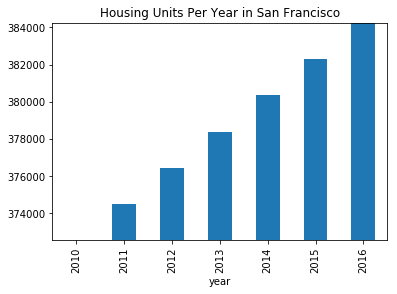

In [6]:
mean_housing_units.plot(kind = 'bar', ylim = (mean_housing_units.iloc[0], mean_housing_units.iloc[6]) , title = 'Housing Units Per Year in San Francisco')

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [7]:
avg_prices_sqrft = sfo_data[['sale_price_sqr_foot', 'gross_rent']].groupby('year').mean()
avg_prices_sqrft 

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


In [8]:
# Calculate the average gross rent and average sale price per square foot
# YOUR CODE HERE!

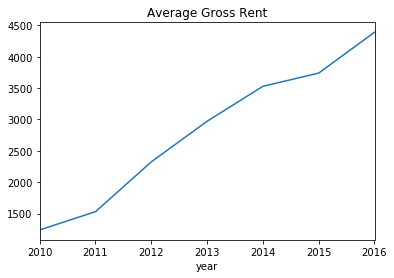

In [9]:
avg_prices_sqrft['gross_rent'].plot( kind = 'line', title = 'Average Gross Rent')

In [10]:
# Plot the Average Gross Rent per Year as a Line Chart 
# YOUR CODE HERE!

### Average Sales Price per Year

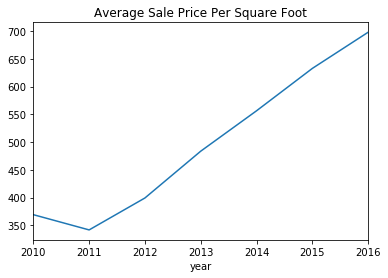

In [11]:
avg_prices_sqrft['sale_price_sqr_foot'].plot(kind = 'line', title = 'Average Sale Price Per Square Foot')

In [12]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [13]:
avg_prices = sfo_data.groupby(['year', 'neighborhood']).mean().reset_index()
avg_prices.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [14]:
# Group by year and neighborhood and then create a new dataframe of the mean values
# YOUR CODE HERE!

In [15]:
avg_prices.hvplot.line( x= 'year', y = 'sale_price_sqr_foot', groupby = 'neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [16]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [18]:
temp = sfo_data.copy()
mean_avg_price = temp.groupby('neighborhood').mean()
top_10 = mean_avg_price.nlargest(10, ['sale_price_sqr_foot']).reset_index()
top_10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [19]:
# Getting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

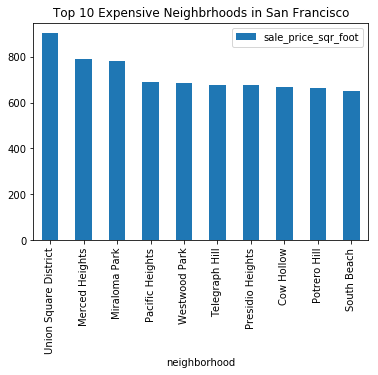

In [20]:
top_10.plot(kind = 'bar', x = 'neighborhood' ,  y = 'sale_price_sqr_foot', title = 'Top 10 Expensive Neighbrhoods in San Francisco' )

In [20]:
# Plotting the data from the top 10 expensive neighborhoods
# YOUR CODE HERE!

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [21]:
px.parallel_coordinates(
    top_10, 
    dimensions= ['sale_price_sqr_foot', 'housing_units', 'gross_rent'], 
    color = 'sale_price_sqr_foot', 
    color_continuous_scale= px.colors.sequential.Inferno
    



)

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

In [22]:
px.parallel_categories(
    top_10, 
    dimensions = ['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'], 
    color = 'sale_price_sqr_foot', 
    color_continuous_scale= px.colors.sequential.Inferno


)

In [24]:
# Parallel Categories Plot
# YOUR CODE HERE!

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [52]:
# Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [24]:
mean_values_per_area = sfo_data.groupby('neighborhood').mean().reset_index()
mean_values_per_area.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [25]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

In [26]:
area_info = pd.concat([df_neighborhood_locations, mean_values_per_area[['sale_price_sqr_foot', 'housing_units', 'gross_rent']]], axis = 1)
area_info.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


In [27]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [31]:
map_plot = px.scatter_mapbox(
    area_info,
    lat = 'Lat', 
    lon = 'Lon', 
    size = 'sale_price_sqr_foot', 
    color = 'gross_rent',
    zoom = 10,
    mapbox_style = 'open-street-map'
)
map_plot.show()